<a href="https://colab.research.google.com/github/JIA-LING-TW/Kaggle_Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 參考：

Copy of 機器學習實作-手把手-Kaggle-鐵達尼號生存預測.ipynb

https://colab.research.google.com/github/AI-FREE-Team/Data-Analytics-in-Practice-Titanic/blob/master/Data%20Analytics%20in%20Practice%20-%20Titanic%20Survival%20Prediction.ipynb

[機器學習專案] Kaggle競賽-鐵達尼號生存預測(Top 3%)

https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f

# **導入資料及匯入所需模組**

In [57]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings( 'ignore' )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use( 'ggplot' )

from IPython.display import display
from IPython.display import display_html

%matplotlib inline
def side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [58]:
from google.colab import files
update = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv
Saving gender_submission.csv to gender_submission (1).csv


# **分析及查看數據資料**

In [59]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')
print(f'train {df_train.shape}')
display( df_train.head(3))
print(f'\ntest {df_test.shape}')
display(df_test.head(3))

train (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



test (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [60]:
df_data = df_train.append(df_test)
df_data.reset_index(inplace=True,drop=True)
print(f'data {df_data.shape}')
df_data

data (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
#train:age,cabin,embarked有miss
#test:age,fare,cabin有miss
def Data_Info(train_data,test_data):
  df_train.info()
  print("-" * 40)
  df_test.info()
Data_Info(df_train,df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [62]:
#顯示文字欄位各項統計數值
#include=['O'],它作為輸出給出非數字特徵的統計數據，如計數、頻率、唯一性等。
print('train:')
print(df_train.describe())
print("-" * 40)
df_train.describe(include=['O'])

train:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
----------------------------------------


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Text(0.5, 1.0, 'train feature corr')

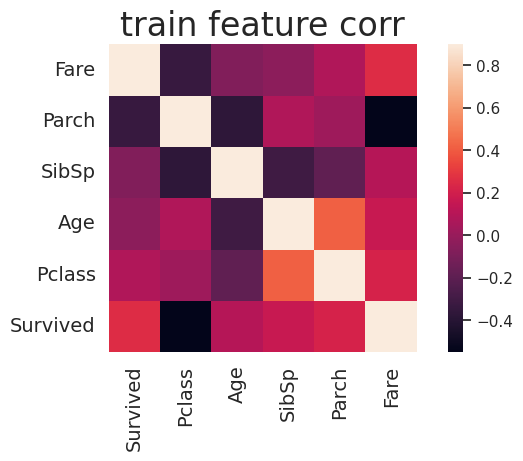

In [63]:
sns.set(context="paper", font="monospace")
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8,4))
train_corr = df_train.drop('PassengerId',axis=1).corr()
sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
ax.set_xticklabels(train_corr.index, size=14)
ax.set_yticklabels(train_corr.columns[::-1], size=14)
ax.set_title('train feature corr', fontsize=24)

# **填補缺漏值**

In [64]:
#以百分比顯示各欄位有多少缺值，用isnull()看資料缺值個數
def Data_Miss_Percentage(data):
  return pd.DataFrame({'DataMissingPercentage':data.isnull().sum()*100/len(df_train)})
Data_Miss_Percentage(df_train)

,DataMissingPercentage
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [65]:
# 定義用來統計欄位缺漏值總數的函數,計算欄位中缺漏值的數量
def Missing_Counts( Data ) :
    missing = Data.isnull().sum()
    missing = missing[ missing>0 ]
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    return  Missing_Count

In [66]:
    print('train:')
    display( Missing_Counts(df_train) )
    print('test')
    display( Missing_Counts(df_test) )

train:


,ColumnName,MissingCount
0,Age,177
1,Cabin,687
2,Embarked,2


test


,ColumnName,MissingCount
0,Age,86
1,Fare,1
2,Cabin,327


In [67]:
def Missing_check( Data ) :
    missing = Data.isnull().sum()  # 計算欄位中缺漏值的數量
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True )
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count
Missing_check(df_data.drop(['Survived'],axis=1))

,ColumnName,MissingCount,Percentage(%)
0,Fare,1,0.08
1,Embarked,2,0.15
2,Age,263,20.09
3,Cabin,1014,77.46


In [68]:
# Name欄位
df_data['Title'] = df_data.Name.str.split(', ', expand=True)[1]
df_data['Title'] = df_data.Title.str.split('.', expand=True)[0]
df_data['Title'].unique()
df_data['Title'] = df_data.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare' )
df_data['Title'] = df_data.Title.replace( ['Ms','Mlle'], 'Miss' )
df_data['Title'] = df_data.Title.replace( 'Mme', 'Mrs' )
df_data['Title'].unique()
# 刪除 name 欄位
df_data.drop( 'Name', axis=1, inplace=True )
df_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [69]:
# Sex欄位
#Label encoding : 把每個類別 mapping 到某個整數，不會增加新欄位
le=preprocessing.LabelEncoder()
df_data['Sex']=le.fit_transform(df_data['Sex'])
df_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,Mr


Sex,0,1,All
Has_Age,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


Pclass,1,2,3,All
Has_Age,,,,
0,39,16,208,263
1,284,261,501,1046
All,323,277,709,1309


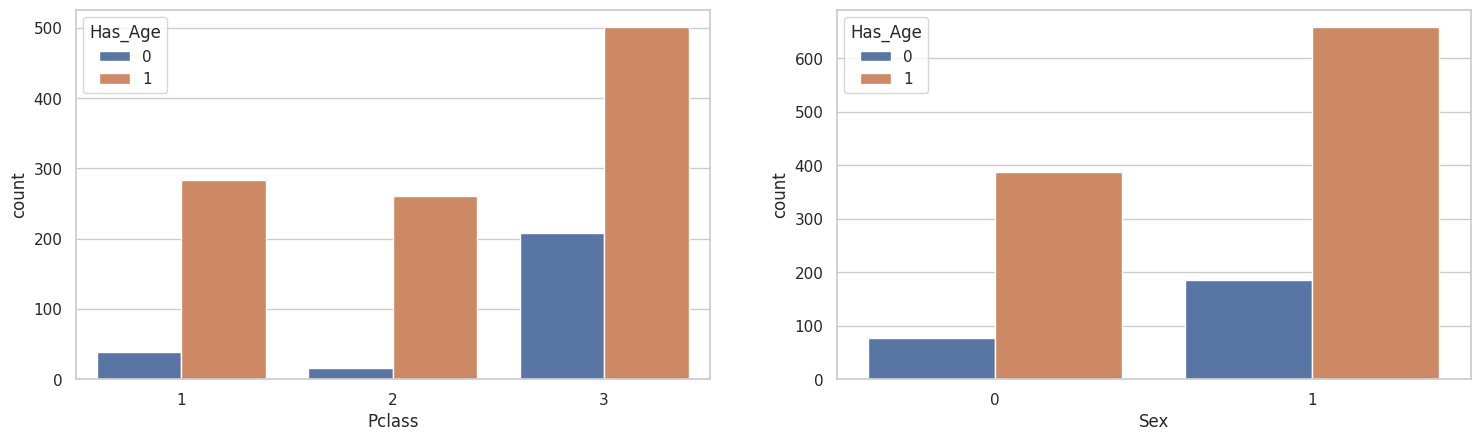

In [70]:
# Age欄位
df_data['Has_Age'] = df_data['Age'].isnull().map(lambda x : 0 if x == True else 1)
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(18)
ax1 = sns.countplot(x=df_data['Pclass'],hue=df_data['Has_Age'],ax=ax1)
ax2 = sns.countplot(x=df_data['Sex'],hue=df_data['Has_Age'],ax=ax2)
pd.crosstab(df_data['Has_Age'],df_data['Sex'],margins=True).round(3)
display( pd.crosstab( df_data.Has_Age, df_data.Sex, margins=True ) )
display( pd.crosstab( df_data.Has_Age, df_data.Pclass, margins=True ) )

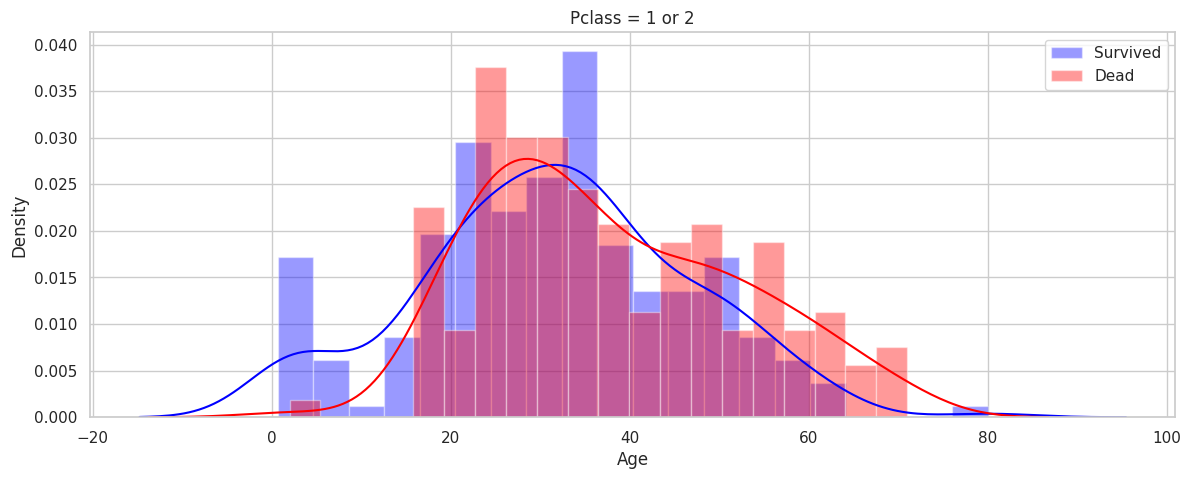

In [71]:
index_S = (df_data.Has_Age==1)&(df_data.Pclass!=3)&(df_data.Survived==1)
index_D = (df_data.Has_Age==1)&(df_data.Pclass!=3)&(df_data.Survived==0)
plt.figure( figsize=(14,5) )
sns.distplot( df_data.loc[index_S,'Age'], bins=20, color='blue', label='Survived' )
sns.distplot( df_data.loc[index_D,'Age'], bins=20, color='red', label='Dead' )
plt.title( 'Pclass = 1 or 2' )
plt.legend( )
plt.show( )

In [72]:
# 計算每個 Title 的年齡平均值及中位數
Age_Mean = df_data[['Title','Age']].groupby( by=['Title'] ).mean()
Age_Median = df_data[['Title','Age']].groupby( by=['Title'] ).median()
Age_Mean.columns = ['Age Mean']
Age_Median.columns = ['Age Median']
Age_Mean.reset_index( inplace=True )
Age_Median.reset_index( inplace=True )
display( Age_Median )
display( Age_Mean )

,Title,Age Median
0,Master,4.0
1,Miss,22.0
2,Mr,29.0
3,Mrs,35.0
4,Rare,48.0
5,the Countess,33.0


,Title,Age Mean
0,Master,5.482642
1,Miss,21.824366
2,Mr,32.252151
3,Mrs,36.918129
4,Rare,45.629630
5,the Countess,33.000000


In [73]:
# 利用每個 Title 的年齡平均數，填補每個 Title 所對應 Age 的缺漏值
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Master'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Master','Age Mean'][0]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Miss'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Miss','Age Mean'][1]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mr'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mr','Age Mean'][2]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mrs'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mrs','Age Mean'][3]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Rare'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Rare','Age Mean'][4]
# 刪除 isAge 欄位
df_data.drop( 'Has_Age', axis=1, inplace=True )
df_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [74]:
# 乘客年齡是否未滿17歲(是：1；否：0)
df_data[ 'is_Age_17' ] = (df_data.Age<17)*1
df_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,is_Age_17
0,1,0.0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1.0,1,0,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1.0,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1.0,1,0,35.000000,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0.0,3,1,35.000000,0,0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Mr,0
1305,1306,NaN,1,0,39.000000,0,0,PC 17758,108.9000,C105,C,Rare,0
1306,1307,NaN,3,1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0
1307,1308,NaN,3,1,32.252151,0,0,359309,8.0500,NaN,S,Mr,0


In [75]:
# 觀察 Cabin 中的種類
df_data['Cabin'].unique()
# 取出 Cabin 中的第一個字母，如果為缺漏值，則以 NoCabin 表示
df_data['Cabin'] = df_data['Cabin'].apply( lambda x:str(x)[0] if not pd.isnull(x) else 'NoCabin' )
df_data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [76]:
# Fare欄位
df_data.Fare = df_data.Fare.fillna(df_data.Fare.mean())

In [77]:
# Embarked欄位
le=preprocessing.LabelEncoder()
df_data['Embarked']=le.fit_transform(df_data['Embarked'])
df_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,is_Age_17
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NoCabin,2,Mr,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C,0,Mrs,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,2,Miss,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C,2,Mrs,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NoCabin,2,Mr,0


In [78]:
train = df_data[:len(df_train)]
test = df_data[:len(df_train):]

In [79]:
X = train.drop(labels=['Survived','PassengerId'],axis=1)
Y = train['Survived']

In [80]:
Base = ['Sex', 'Pclass']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base],Y)
print('Base oob score:%.5f' %(Base_Model.oob_score_))

Base oob score:0.73176


In [81]:
Missing_Counts( df_data.drop('Survived', axis=1) )

,ColumnName,MissingCount


# fare處理 **問題**

Fare       
Survived    0.0    1.0
Pclass                
1         44.75  77.96
2         13.00  21.00
3          8.05   8.52

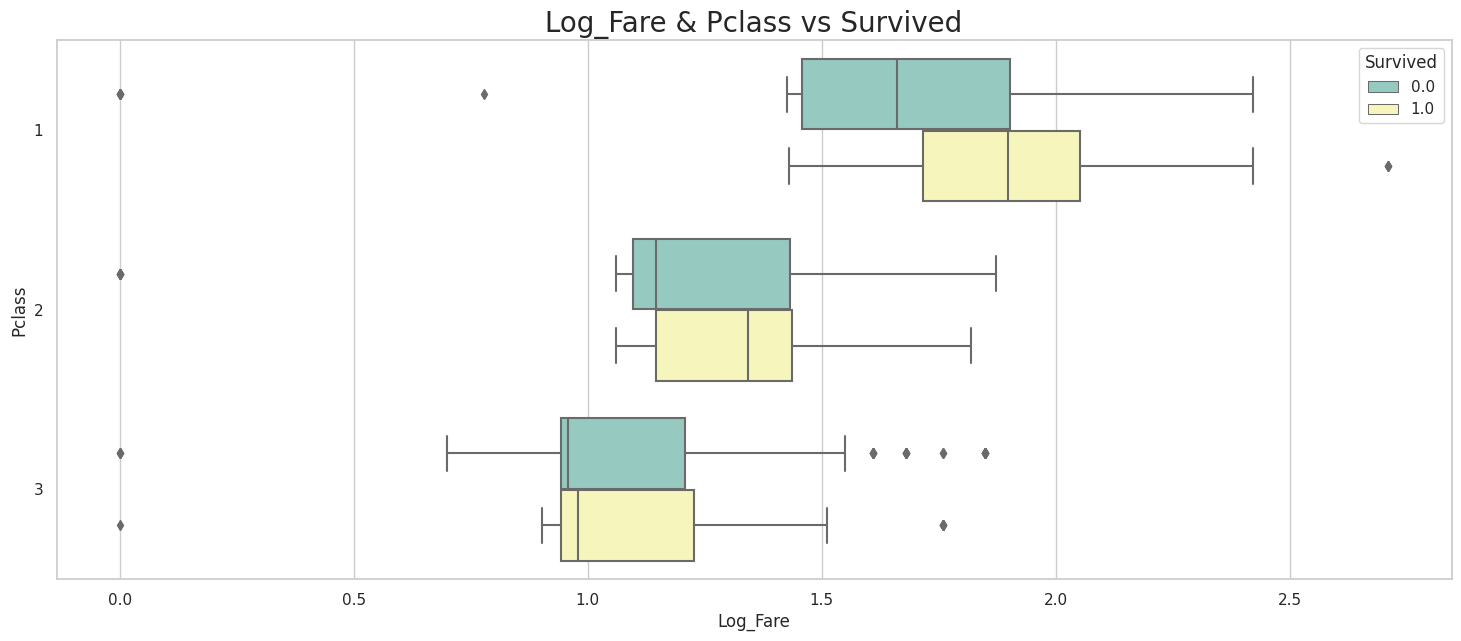

In [82]:
# there is some bugs in log-scale of boxplot.
# alternatively, we transform x into log10(x) for visualization.
fig, ax = plt.subplots( figsize = (18,7) )
df_data['Log_Fare'] = (df_data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=df_data, orient='h'
                ,ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(df_data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(2)

In [83]:
# 用pandas qcut以累積百分比來切分
df_data['FareBin_4'] = pd.qcut(df_data['Fare'], 4)
df_data['FareBin_5'] = pd.qcut(df_data['Fare'], 5)
df_data['FareBin_6'] = pd.qcut(df_data['Fare'], 6)

df_data['FareBin_Code_4'] = le.fit_transform(df_data['FareBin_4'])
df_data['FareBin_Code_5'] = le.fit_transform(df_data['FareBin_5'])
df_data['FareBin_Code_6'] = le.fit_transform(df_data['FareBin_6'])

# cross tab
df_4 = pd.crosstab(df_data['FareBin_Code_4'],df_data['Pclass'])
df_5 = pd.crosstab(df_data['FareBin_Code_5'],df_data['Pclass'])
df_6 = pd.crosstab(df_data['FareBin_Code_6'],df_data['Pclass'])

side_by_side(df_4,df_5,df_6)


Pclass,1,2,3
FareBin_Code_4,,,
0,8,6,323
1,0,128,192
2,77,104,147
3,238,39,47
Pclass,1,2,3
FareBin_Code_5,,,
0,8,6,261
1,0,36,218
2,0,124,134


In [84]:
# fare切割完再分一次訓練與測試集
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']
# show columns
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Title', 'is_Age_17', 'Log_Fare', 'FareBin_4', 'FareBin_5',
       'FareBin_6', 'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6'],
      dtype='object')

In [85]:
#RFE選擇特徵，跟Chi square、或是information gain比可以考慮到特徵之間的交互作用
compare = ['Sex','Pclass','FareBin_Code_4','FareBin_Code_5','FareBin_Code_6']
selector = RFECV(RandomForestClassifier(n_estimators=250,min_samples_split=20),cv=10,n_jobs=-1)
selector.fit(X[compare], Y)
print(selector.support_)
print(selector.ranking_)
print(selector.cv_results_['mean_test_score']*100)
#看來切6份比較好，但還要驗證

[ True  True  True  True  True]
[1 1 1 1 1]
[78.67290886 77.44444444 78.9051186  79.24344569 80.25468165]


In [86]:
print(selector.cv_results_.keys())

dict_keys(['mean_test_score', 'std_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score'])


In [87]:
score_b4,score_b5, score_b6 = [], [], []
seeds = 10
for i in range(seeds):
    diff_cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=i)
    selector = RFECV(RandomForestClassifier(random_state=i,n_estimators=250,min_samples_split=20),cv=diff_cv,n_jobs=-1)
    selector.fit(X[compare], Y)
    score_b4.append(selector.cv_results_['split0_test_score'])

In [88]:
    score_b5.append(selector.cv_results_['split1_test_score'])
    score_b6.append(selector.cv_results_['split2_test_score'])

In [89]:
# to np.array
score_list = [score_b4, score_b5, score_b6]
for item in score_list:
    item = np.array(item*100)

In [90]:
b4, b5, b6 = ['Sex', 'Pclass','FareBin_Code_4'], ['Sex','Pclass','FareBin_Code_5'],\
['Sex','Pclass','FareBin_Code_6']
b4_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b4_Model.fit(X[b4], Y)
b5_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b5_Model.fit(X[b5], Y)
b6_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b6_Model.fit(X[b6], Y)
print('b4 oob score :%.5f' %(b4_Model.oob_score_),'   LB_Public : 0.7790')
print('b5 oob score :%.5f '%(b5_Model.oob_score_),' LB_Public : 0.79425')
print('b6 oob score : %.5f' %(b6_Model.oob_score_), '  LB_Public : 0.77033')

b4 oob score :0.80584    LB_Public : 0.7790
b5 oob score :0.81033   LB_Public : 0.79425
b6 oob score : 0.80135   LB_Public : 0.77033


# ticket處理 **問題**

In [91]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [92]:
# Family_size
df_data['Family_size'] = df_data['SibSp'] + df_data['Parch'] + 1

In [93]:
df_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title,is_Age_17,Log_Fare,FareBin_4,FareBin_5,FareBin_6,FareBin_Code_4,FareBin_Code_5,FareBin_Code_6,Family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NoCabin,...,Mr,0,0.916454,"(-0.001, 7.896]","(-0.001, 7.854]","(-0.001, 7.775]",0,0,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C,...,Mrs,0,1.859038,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,...,Miss,0,0.950608,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C,...,Mrs,0,1.733197,"(31.275, 512.329]","(41.579, 512.329]","(26.0, 53.1]",3,4,4,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NoCabin,...,Mr,0,0.956649,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1,1


In [94]:
#觀察相同票根‘那些人的姓名、票價、艙位、家庭人數
deplicate_ticket = []
for tk in df_data.Ticket.unique():
    tem = df_data.loc[df_data.Ticket == tk, 'Fare']
    #print(tem.count())
    if tem.count() > 1:
        #print(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare']])
        deplicate_ticket.append(df_data.loc[df_data.Ticket == tk,['Title','Ticket','Fare','Cabin','Family_size','Survived']])
deplicate_ticket = pd.concat(deplicate_ticket)
deplicate_ticket.head(14)

,Title,Ticket,Fare,Cabin,Family_size,Survived
1,Mrs,PC 17599,71.2833,C,2,1.0
1125,Mr,PC 17599,71.2833,C,2,NaN
3,Mrs,113803,53.1000,C,2,1.0
137,Mr,113803,53.1000,C,2,0.0
6,Mr,17463,51.8625,E,1,0.0
1037,Mr,17463,51.8625,E,1,NaN
7,Master,349909,21.0750,NoCabin,5,0.0
24,Miss,349909,21.0750,NoCabin,5,0.0
374,Miss,349909,21.0750,NoCabin,5,0.0
567,Mrs,349909,21.0750,NoCabin,5,0.0


In [97]:
df_fri = deplicate_ticket.loc[(deplicate_ticket.Family_size == 1) & (deplicate_ticket.Survived.notnull())].head(7)
df_fami = deplicate_ticket.loc[(deplicate_ticket.Family_size > 1) & (deplicate_ticket.Survived.notnull())].head(7)
display(df_fri,df_fami)
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print('friends: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size == 1]))
print('families: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size > 1]))

,Title,Ticket,Fare,Cabin,Family_size,Survived
6,Mr,17463,51.8625,E,1,0.0
20,Mr,239865,26.0000,NoCabin,1,0.0
791,Mr,239865,26.0000,NoCabin,1,0.0
195,Miss,PC 17569,146.5208,B,1,1.0
681,Mr,PC 17572,76.7292,D,1,1.0
61,Miss,113572,80.0000,B,1,1.0
829,Mrs,113572,80.0000,B,1,1.0


,Title,Ticket,Fare,Cabin,Family_size,Survived
1,Mrs,PC 17599,71.2833,C,2,1.0
3,Mrs,113803,53.1000,C,2,1.0
137,Mr,113803,53.1000,C,2,0.0
7,Master,349909,21.0750,NoCabin,5,0.0
24,Miss,349909,21.0750,NoCabin,5,0.0
374,Miss,349909,21.0750,NoCabin,5,0.0
567,Mrs,349909,21.0750,NoCabin,5,0.0


people keep the same ticket: 596 
friends: 127 
families: 469 


In [99]:
# the same ticket family or friends
df_data['Connected_Survival'] = 0.5 # default
for _, df_grp in df_data.groupby('Ticket'):
    if (len(df_grp) > 1):
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (smin==0.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0
#print
print('people same ticket: %.0f '%len(deplicate_ticket))
print("connected information : %.0f"
      %(df_data[df_data['Connected_Survival']!=0.5].shape[0]))
df_data.groupby('Connected_Survival')[['Survived']].mean().round(3)

people same ticket: 596 
connected information : 496


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


In [105]:
# Base_Model基準模型:RandomForestClassifier，只對性別，階級編碼
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
Base_pred = Base_Model.predict(X_Submit[Base])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],"Survived":Base_pred.astype(int)})
submit.to_csv("submit_Base.csv",index=False)

In [117]:
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [118]:
connect = ['Sex','Pclass','FareBin_Code_5','Connected_Survival']
connect_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20
                                       ,oob_score=True)
connect_Model.fit(X[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_))

connect oob score :0.82379


In [119]:
#增加family之後
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
connect_pred = connect_Model.predict(X_Submit[connect])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],"Survived":connect_pred.astype(int)})
submit.to_csv("submit_10946029.csv",index=False)